<a href="https://colab.research.google.com/github/joyb05/Market-Basket-Analysis-Restaurant-Dataset/blob/main/Market_Basket_Analysis_Restaurant_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd. set_option("display.max_colwidth", None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant.csv")

In [7]:
df.head()

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Number    61727 non-null  int64  
 1   Item_Name       61727 non-null  object 
 2   Quantity        61727 non-null  int64  
 3   Product_Price   61727 non-null  float64
 4   Total_products  61727 non-null  int64  
 5   total_cost      61727 non-null  float64
 6   Date            61727 non-null  object 
 7   Time            61727 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.8+ MB


In [9]:
df.describe()

,Order_Number,Quantity,Product_Price,Total_products,total_cost
count,61727.000000,61727.000000,61727.000000,61727.000000,61727.000000
mean,9081.128744,1.254200,6.066865,7.100426,47.225334
std,4050.603971,0.853417,3.101551,4.105486,45.561535
min,651.000000,1.000000,0.500000,1.000000,14.400000
25%,5543.000000,1.000000,2.950000,5.000000,23.700000
50%,9042.000000,1.000000,5.950000,6.000000,35.800000
75%,12601.000000,1.000000,8.950000,8.000000,55.650000
max,16118.000000,51.000000,17.950000,60.000000,1790.000000


In [12]:
df.isnull().sum()

Order_Number      0
Item_Name         0
Quantity          0
Product_Price     0
Total_products    0
total_cost        0
Date              0
Time              0
dtype: int64

In [13]:
df['Date'] = pd.to_datetime(df.Date)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61727 entries, 0 to 61726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_Number    61727 non-null  int64         
 1   Item_Name       61727 non-null  object        
 2   Quantity        61727 non-null  int64         
 3   Product_Price   61727 non-null  float64       
 4   Total_products  61727 non-null  int64         
 5   total_cost      61727 non-null  float64       
 6   Date            61727 non-null  datetime64[ns]
 7   Time            61727 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.8+ MB


In [15]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)

In [16]:
df['date_name'] = df['Date'].dt.day_name()

In [17]:
sns.set(rc = {'figure.figsize':(16,8)})

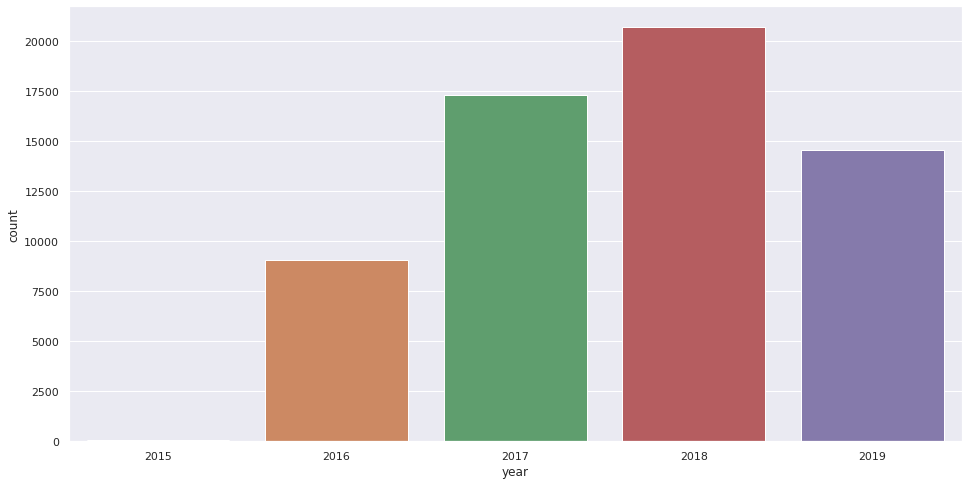

In [18]:
sns.countplot(x = 'year', data = df)

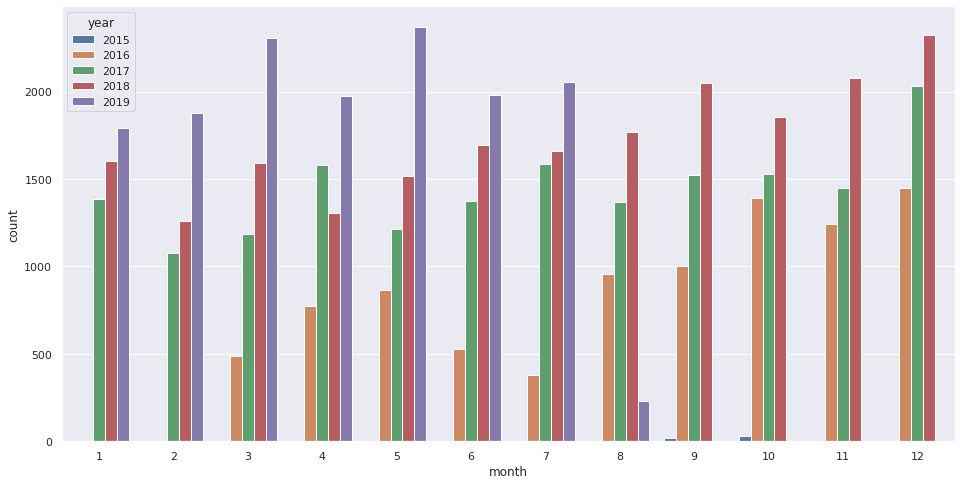

In [20]:
sns.countplot(x = 'month', hue = 'year', data = df)

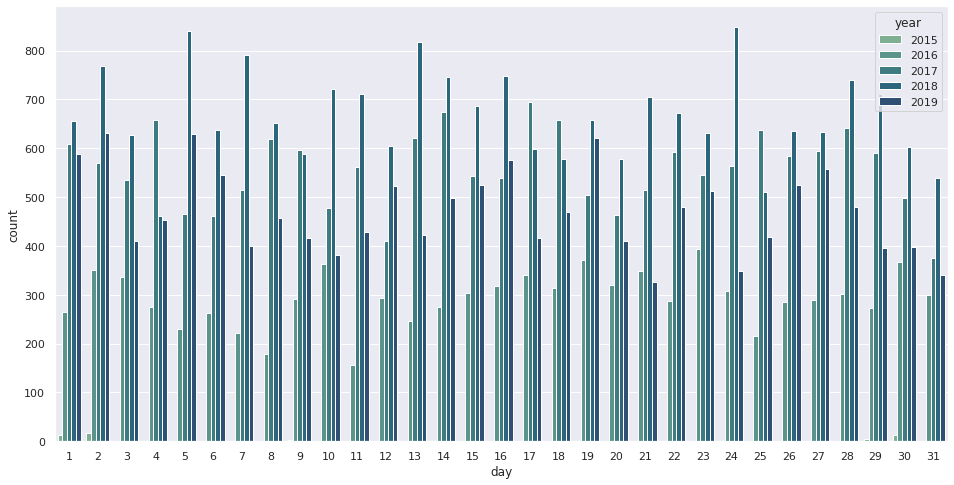

In [21]:
sns.countplot(x = 'day', data = df, hue = 'year', palette = 'crest')

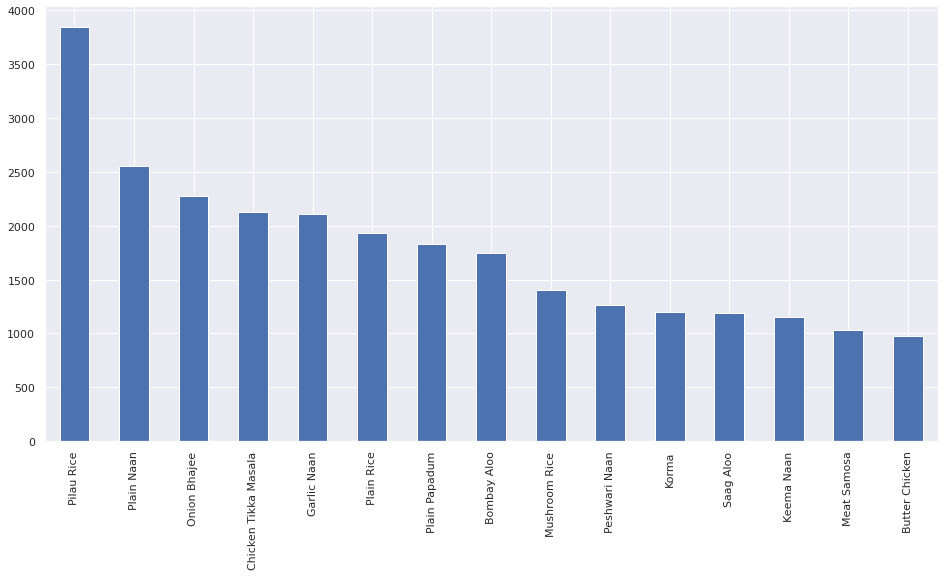

In [23]:
df['Item_Name'].value_counts()[:15].plot(kind = 'bar')
plt.show()

In [24]:
member = df
member

,Order_Number,Item_Name,Quantity,Product_Price,Total_products,total_cost,Date,Time,day,month,year,date_name
0,6769,Korma,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday
1,6769,Chicken Tikka Masala,25,8.95,8,1790.0,2017-09-18,16:54:00,18,9,2017,Monday
2,9374,House white wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday
3,9374,House Red wine 75cl,2,17.95,46,1651.4,2018-04-29,14:16:00,29,4,2018,Sunday
4,6769,Chicken Biryani,20,9.95,8,1592.0,2017-09-18,16:54:00,18,9,2017,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
61722,8523,Plain Papadum,2,0.80,9,14.4,2018-02-14,22:57:00,14,2,2018,Wednesday
61723,10315,Plain Papadum,2,0.80,9,14.4,2018-07-14,22:59:00,14,7,2018,Saturday
61724,8013,Spicy Papadum,2,0.80,9,14.4,2017-12-31,20:38:00,31,12,2017,Sunday
61725,8013,Plain Papadum,2,0.80,9,14.4,2017-12-31,20:38:00,31,12,2017,Sunday


In [25]:
transactions_members = [a[1]['Item_Name'].tolist() for a in list(member.groupby('Order_Number'))]

In [26]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [27]:
te1 = TransactionEncoder()

In [28]:
te_ary1 = te1.fit(transactions_members).transform(transactions_members)

In [29]:
te1.columns_

['Aloo Chaat',
 'Aloo Gobi',
 'Aloo Methi',
 'Baingan Hari Mirch',
 'Bengal Fish Biryani',
 'Bengal Fish Karahi',
 'Bengal Fry Fish',
 'Bengal King Prawn',
 'Bengal Salad',
 'Bhindi Bhajee',
 'Bhuna',
 'Bhuna - Chicken',
 'Bhuna - Chicken Tikka',
 'Bhuna - King Prawn',
 'Bhuna - Lamb',
 'Bhuna - Prawn',
 'Bombay Aloo',
 'Bottle Coke',
 'Bottle Diet Coke',
 'Brinjal Bhajee',
 'Butter Chicken',
 'COBRA ( LARGE )',
 'COBRA (330ML)',
 'COBRA (660ML)',
 'Cauliflower Bhajee',
 'Chana Masala',
 'Chapati',
 'Chicken Achar',
 'Chicken Balti',
 'Chicken Biryani',
 'Chicken Chaat',
 'Chicken Chaat Main',
 'Chicken Chilli Garlic',
 'Chicken Hari Mirch',
 'Chicken Haryali',
 'Chicken Karahi',
 'Chicken Mysore',
 'Chicken Pakora',
 'Chicken Rezala',
 'Chicken Roshni',
 'Chicken Shashlick',
 'Chicken Shashlick Curry',
 'Chicken Sylhet',
 'Chicken Tikka',
 'Chicken Tikka (Main)',
 'Chicken Tikka Balti',
 'Chicken Tikka Biryani',
 'Chicken Tikka Chilli Masala',
 'Chicken Tikka Garlic',
 'Chicken Tikka 

In [30]:
a = te1.columns_

In [31]:
te_ary1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
transactions_members = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_members.describe()

In [33]:
transactions_members

,Aloo Chaat,Aloo Gobi,Aloo Methi,Baingan Hari Mirch,Bengal Fish Biryani,Bengal Fish Karahi,Bengal Fry Fish,Bengal King Prawn,Bengal Salad,Bhindi Bhajee,...,Vegetable Rice,Vegetable Roll,Vegetable Samosa,Vindaloo,Vindaloo - Chicken,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo Sauce
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13085,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13086,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [34]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [35]:
import matplotlib.pyplot as plt

In [36]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.sort_values('support', ascending= False).head(10)

,support,itemsets
168,0.293857,(Pilau Rice)
169,0.195064,(Plain Naan)
151,0.174129,(Onion Bhajee)
51,0.162821,(Chicken Tikka Masala)
78,0.160987,(Garlic Naan)
171,0.147616,(Plain Rice)
170,0.139594,(Plain Papadum)
16,0.133634,(Bombay Aloo)
149,0.107350,(Mushroom Rice)
167,0.096883,(Peshwari Naan)


In [37]:
freq_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   6917 non-null   float64
 1   itemsets  6917 non-null   object 
dtypes: float64(1), object(1)
memory usage: 108.2+ KB


In [38]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [39]:
freq_items_1 = (freq_items1['length'] == 1)
freq_items1[freq_items_1].sort_values('support', ascending= False).head(10)

,support,itemsets,length
168,0.293857,(Pilau Rice),1
169,0.195064,(Plain Naan),1
151,0.174129,(Onion Bhajee),1
51,0.162821,(Chicken Tikka Masala),1
78,0.160987,(Garlic Naan),1
171,0.147616,(Plain Rice),1
170,0.139594,(Plain Papadum),1
16,0.133634,(Bombay Aloo),1
149,0.107350,(Mushroom Rice),1
167,0.096883,(Peshwari Naan),1


In [40]:
freq_items_2 = (freq_items1['length'] == 2)
freq_items1[freq_items_2].sort_values('support', ascending= False).head(10)

,support,itemsets,length
2294,0.096501,"(Pilau Rice, Plain Naan)",2
2295,0.078010,"(Pilau Rice, Plain Papadum)",2
1236,0.077094,"(Pilau Rice, Chicken Tikka Masala)",2
2171,0.076711,"(Pilau Rice, Onion Bhajee)",2
1560,0.073120,"(Pilau Rice, Garlic Naan)",2
512,0.059749,"(Pilau Rice, Bombay Aloo)",2
1237,0.053331,"(Plain Naan, Chicken Tikka Masala)",2
2337,0.052644,"(Plain Naan, Plain Rice)",2
2336,0.052109,"(Plain Naan, Plain Papadum)",2
2265,0.049435,"(Pilau Rice, Peshwari Naan)",2


In [41]:
freq_items_3 = (freq_items1['length'] == 3)
freq_items1[freq_items_3].sort_values('support', ascending= False).head(10)

,support,itemsets,length
3981,0.032855,"(Pilau Rice, Plain Naan, Chicken Tikka Masala)",3
5141,0.029722,"(Pilau Rice, Plain Naan, Plain Papadum)",3
5039,0.027659,"(Pilau Rice, Plain Naan, Onion Bhajee)",3
3982,0.025749,"(Pilau Rice, Chicken Tikka Masala, Plain Papadum)",3
3018,0.023762,"(Pilau Rice, Bombay Aloo, Plain Naan)",3
5040,0.022311,"(Pilau Rice, Plain Papadum, Onion Bhajee)",3
4437,0.021776,"(Pilau Rice, Plain Papadum, Garlic Naan)",3
3840,0.020553,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan)",3
3957,0.020400,"(Pilau Rice, Chicken Tikka Masala, Onion Bhajee)",3
2835,0.019789,"(Pilau Rice, Bombay Aloo, Chicken Tikka Masala)",3


In [42]:
freq_items_4 = (freq_items1['length'] == 4)
freq_items1[freq_items_4].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6068,0.012683,"(Pilau Rice, Chicken Tikka Masala, Plain Naan, Plain Papadum)",4
5435,0.011232,"(Pilau Rice, Bombay Aloo, Plain Naan, Chicken Tikka Masala)",4
6049,0.010086,"(Pilau Rice, Plain Naan, Chicken Tikka Masala, Onion Bhajee)",4
6509,0.008787,"(Pilau Rice, Plain Naan, Plain Papadum, Onion Bhajee)",4
5585,0.008481,"(Pilau Rice, Bombay Aloo, Plain Naan, Plain Papadum)",4
6069,0.008175,"(Pilau Rice, Plain Rice, Plain Naan, Chicken Tikka Masala)",4
5916,0.008099,"(Pilau Rice, Chicken Tikka Masala, Plain Papadum, Garlic Naan)",4
5436,0.007488,"(Pilau Rice, Bombay Aloo, Chicken Tikka Masala, Plain Papadum)",4
5439,0.007335,"(Bombay Aloo, Chicken Tikka Masala, Plain Naan, Plain Papadum)",4
6050,0.006877,"(Pilau Rice, Chicken Tikka Masala, Plain Papadum, Onion Bhajee)",4


In [43]:
freq_items_5 = (freq_items1['length'] == 5)
freq_items1[freq_items_5].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6637,0.004661,"(Pilau Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)",5
6607,0.003591,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan, Bombay Aloo, Plain Papadum)",5
6803,0.003438,"(Pilau Rice, Chicken Tikka Masala, Plain Naan, Plain Papadum, Onion Bhajee)",5
6606,0.003362,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan, Bombay Aloo, Plain Naan)",5
6813,0.003285,"(Plain Rice, Pilau Rice, Chicken Tikka Masala, Plain Naan, Plain Papadum)",5
6640,0.003209,"(Plain Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)",5
6753,0.002903,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan, Plain Naan, Plain Papadum)",5
6638,0.002827,"(Plain Rice, Pilau Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan)",5
6630,0.002751,"(Pilau Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Onion Bhajee)",5
6658,0.002598,"(Pilau Rice, Garlic Naan, Bombay Aloo, Plain Naan, Plain Papadum)",5


In [44]:
freq_items_6 = (freq_items1['length'] == 6)
freq_items1[freq_items_6].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6883,0.001987,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan, Bombay Aloo, Plain Naan, Plain Papadum)",6
6885,0.001605,"(Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)",6
6869,0.001528,"(Plain Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",6
6880,0.001452,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan, Bombay Aloo, Masala Sauce, Plain Naan)",6
6905,0.001452,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Plain Naan, Plain Papadum)",6
6893,0.001452,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Bombay Aloo, Plain Naan, Plain Papadum)",6
6886,0.001452,"(Special Fried Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)",6
6864,0.001452,"(Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Butter Chicken)",6
6863,0.001452,"(Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",6
6894,0.001375,"(Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Plain Naan, Plain Papadum, Butter Chicken)",6


In [45]:
freq_items_7 = (freq_items1['length'] == 7)
freq_items1[freq_items_7].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6907,0.001375,"(Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",7
6914,0.001375,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)",7
6908,0.001222,"(Special Fried Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",7
6909,0.001222,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Butter Chicken)",7
6910,0.001222,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Papadum, Butter Chicken)",7
6911,0.001222,"(Special Fried Rice, Plain Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",7
6912,0.001222,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",7
6915,0.001222,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Plain Naan, Plain Papadum, Butter Chicken)",7
6913,0.001070,"(Pilau Rice, Chicken Tikka Masala, Garlic Naan, Bombay Aloo, Masala Sauce, Plain Naan, Plain Papadum)",7


In [46]:
freq_items_8 = (freq_items1['length'] == 8)
freq_items1[freq_items_8].sort_values('support', ascending= False).head(10)

,support,itemsets,length
6916,0.001222,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",8


In [47]:
rules1 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aloo Chaat),(Bombay Aloo),0.021241,0.133634,0.001834,0.086331,0.646026,-0.001005,0.948228
1,(Bombay Aloo),(Aloo Chaat),0.133634,0.021241,0.001834,0.013722,0.646026,-0.001005,0.992377
2,(Aloo Chaat),(Chana Masala),0.021241,0.028881,0.001146,0.053957,1.868220,0.000533,1.026506
3,(Chana Masala),(Aloo Chaat),0.028881,0.021241,0.001146,0.039683,1.868220,0.000533,1.019204
4,(Aloo Chaat),(Chapati),0.021241,0.050428,0.001452,0.068345,1.355308,0.000381,1.019232
5,(Chapati),(Aloo Chaat),0.050428,0.021241,0.001452,0.028788,1.355308,0.000381,1.007771
6,(Aloo Chaat),(Chicken Chaat),0.021241,0.025520,0.001299,0.061151,2.396243,0.000757,1.037952
7,(Chicken Chaat),(Aloo Chaat),0.025520,0.021241,0.001299,0.050898,2.396243,0.000757,1.031248
8,(Aloo Chaat),(Chicken Tikka),0.021241,0.052338,0.002063,0.097122,1.855674,0.000951,1.049602
9,(Chicken Tikka),(Aloo Chaat),0.052338,0.021241,0.002063,0.039416,1.855674,0.000951,1.018921


In [48]:
top_support = rules1.sort_values('support', ascending= False)
top_support.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4149,(Plain Naan),(Pilau Rice),0.195064,0.293857,0.096501,0.494712,1.683513,0.039180,1.397506
4148,(Pilau Rice),(Plain Naan),0.293857,0.195064,0.096501,0.328393,1.683513,0.039180,1.198522
4150,(Pilau Rice),(Plain Papadum),0.293857,0.139594,0.078010,0.265471,1.901740,0.036990,1.171371
4151,(Plain Papadum),(Pilau Rice),0.139594,0.293857,0.078010,0.558840,1.901740,0.036990,1.600649
2032,(Pilau Rice),(Chicken Tikka Masala),0.293857,0.162821,0.077094,0.262350,1.611283,0.029247,1.134928
2033,(Chicken Tikka Masala),(Pilau Rice),0.162821,0.293857,0.077094,0.473487,1.611283,0.029247,1.341168
3903,(Onion Bhajee),(Pilau Rice),0.174129,0.293857,0.076711,0.440544,1.499179,0.025542,1.262196
3902,(Pilau Rice),(Onion Bhajee),0.293857,0.174129,0.076711,0.261050,1.499179,0.025542,1.117628
2681,(Garlic Naan),(Pilau Rice),0.160987,0.293857,0.073120,0.454200,1.545651,0.025813,1.293777
2680,(Pilau Rice),(Garlic Naan),0.293857,0.160987,0.073120,0.248830,1.545651,0.025813,1.116941


In [49]:
top_confidence = rules1.sort_values('confidence', ascending= False)
top_confidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23960,"(Lamb Haryali, Lamb Shashlick, Garlic Naan)",(Bombay Aloo),0.001299,0.133634,0.001299,1.0,7.483133,0.001125,inf
52241,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Butter Chicken)",(Plain Papadum),0.001222,0.139594,0.001222,1.0,7.163656,0.001052,inf
49063,"(Special Fried Rice, Mushroom Bhajee, Plain Naan, Plain Papadum, Butter Chicken)",(Bombay Aloo),0.001222,0.133634,0.001222,1.0,7.483133,0.001059,inf
49062,"(Special Fried Rice, Mushroom Bhajee, Bombay Aloo, Plain Papadum, Butter Chicken)",(Plain Naan),0.001222,0.195064,0.001222,1.0,5.126518,0.000984,inf
52246,"(Special Fried Rice, Mushroom Bhajee, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",(Plain Rice),0.001222,0.147616,0.001222,1.0,6.774327,0.001042,inf
52245,"(Special Fried Rice, Plain Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",(Mushroom Bhajee),0.001222,0.025061,0.001222,1.0,39.902439,0.001192,inf
52244,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Bombay Aloo, Plain Naan, Plain Papadum, Butter Chicken)",(Chicken Tikka Masala),0.001222,0.162821,0.001222,1.0,6.141718,0.001023,inf
49061,"(Special Fried Rice, Mushroom Bhajee, Bombay Aloo, Plain Naan, Butter Chicken)",(Plain Papadum),0.001222,0.139594,0.001222,1.0,7.163656,0.001052,inf
52243,"(Special Fried Rice, Plain Rice, Mushroom Bhajee, Chicken Tikka Masala, Plain Naan, Plain Papadum, Butter Chicken)",(Bombay Aloo),0.001222,0.133634,0.001222,1.0,7.483133,0.001059,inf
12342,"(Dhansak - Chicken, Chicken Tikka Masala)",(Pilau Rice),0.001452,0.293857,0.001452,1.0,3.403016,0.001025,inf


In [50]:
top_lift = rules1.sort_values('lift', ascending= False)
top_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52372,"(Bombay Aloo, Mushroom Bhajee, Plain Rice, Plain Papadum)","(Special Fried Rice, Plain Naan, Chicken Tikka Masala, Butter Chicken)",0.001681,0.001222,0.001222,0.727273,594.909091,0.00122,3.662184
52361,"(Special Fried Rice, Plain Naan, Chicken Tikka Masala, Butter Chicken)","(Bombay Aloo, Mushroom Bhajee, Plain Rice, Plain Papadum)",0.001222,0.001681,0.001222,1.000000,594.909091,0.00122,inf
52376,"(Mushroom Bhajee, Plain Rice, Plain Papadum, Butter Chicken)","(Special Fried Rice, Bombay Aloo, Plain Naan, Chicken Tikka Masala)",0.001375,0.001528,0.001222,0.888889,581.688889,0.00122,8.986247
52357,"(Special Fried Rice, Bombay Aloo, Plain Naan, Chicken Tikka Masala)","(Mushroom Bhajee, Plain Rice, Plain Papadum, Butter Chicken)",0.001528,0.001375,0.001222,0.800000,581.688889,0.00122,4.993123
52427,"(Mushroom Bhajee, Plain Rice, Butter Chicken)","(Special Fried Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)",0.001452,0.001452,0.001222,0.842105,580.077562,0.00122,6.324139
52306,"(Special Fried Rice, Chicken Tikka Masala, Bombay Aloo, Plain Naan, Plain Papadum)","(Mushroom Bhajee, Plain Rice, Butter Chicken)",0.001452,0.001452,0.001222,0.842105,580.077562,0.00122,6.324139
52360,"(Special Fried Rice, Plain Naan, Chicken Tikka Masala, Plain Papadum)","(Bombay Aloo, Mushroom Bhajee, Plain Rice, Butter Chicken)",0.001528,0.001452,0.001222,0.800000,551.073684,0.00122,4.992741
51402,"(Special Fried Rice, Bombay Aloo, Plain Naan, Chicken Tikka Masala)","(Mushroom Bhajee, Plain Rice, Butter Chicken)",0.001528,0.001452,0.001222,0.800000,551.073684,0.00122,4.992741
52373,"(Bombay Aloo, Mushroom Bhajee, Plain Rice, Butter Chicken)","(Special Fried Rice, Plain Naan, Chicken Tikka Masala, Plain Papadum)",0.001452,0.001528,0.001222,0.842105,551.073684,0.00122,6.323655
52158,"(Special Fried Rice, Plain Naan, Chicken Tikka Masala, Plain Papadum)","(Mushroom Bhajee, Plain Rice, Butter Chicken)",0.001528,0.001452,0.001222,0.800000,551.073684,0.00122,4.992741
